Predicted values for the training dataset:
[ 4.07129932e-09 -2.78074011e-09  5.19286713e-09 ... -5.26281436e-10
  2.16351990e-09  2.53696493e-10]

Predicted values for the test dataset:
[ 1.67913821e-08 -9.50732062e-09 -5.42196454e-09 ...  1.60620354e-09
  3.57989166e-09 -6.50018345e-09]

R-squared for training data: 0.5621


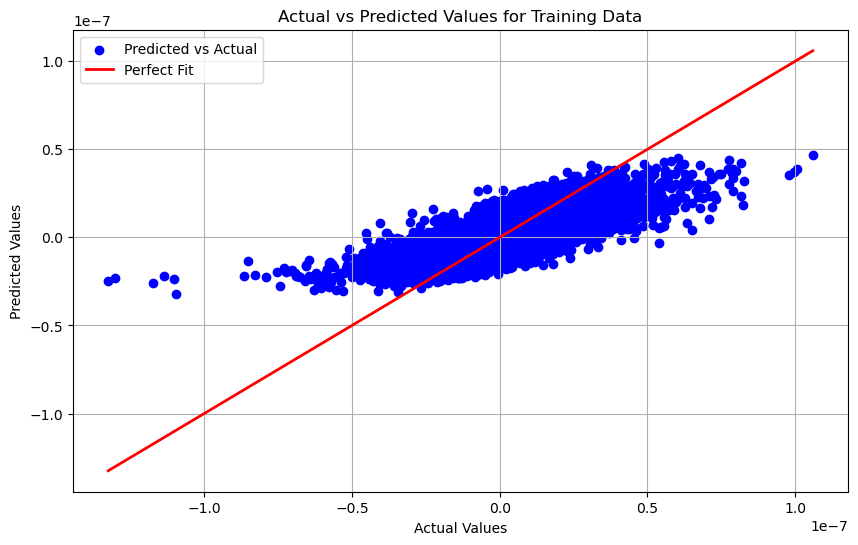

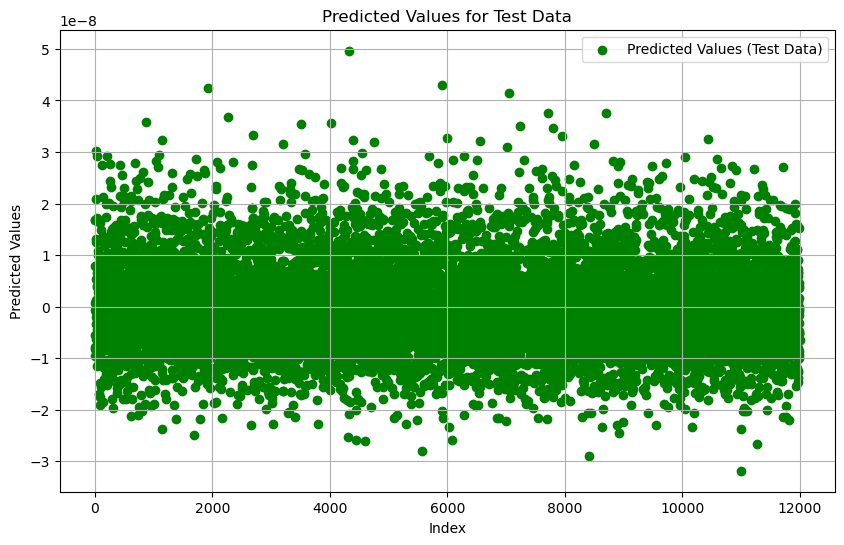

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Multivariate Polynomial Regression
class PolynomialRegression:
    
    def __init__(self, degree, learning_rate, iterations):
        self.degree = degree
        self.learning_rate = learning_rate
        self.iterations = iterations

    # Function to transform X into polynomial features
    def transform(self, X):
        # Initialize X_transform with bias term (1)
        X_transform = np.ones((X.shape[0], 1))

        # Create polynomial features
        for d in range(1, self.degree + 1):
            for feature_index in range(X.shape[1]):
                # Generate the polynomial terms for each feature
                x_pow = np.power(X[:, feature_index], d)
                X_transform = np.append(X_transform, x_pow.reshape(-1, 1), axis=1)

        # Add interaction terms (product of two different features)
        for i in range(X.shape[1]):
            for j in range(i + 1, X.shape[1]):
                interaction_term = X[:, i] * X[:, j]
                X_transform = np.append(X_transform, interaction_term.reshape(-1, 1), axis=1)

                # Add terms for product of one feature with the square of another feature
                square_product = X[:, i] * np.power(X[:, j], 2)
                X_transform = np.append(X_transform, square_product.reshape(-1, 1), axis=1)

                reverse_square_product = X[:, j] * np.power(X[:, i], 2)
                X_transform = np.append(X_transform, reverse_square_product.reshape(-1, 1), axis=1)

        return X_transform   
    
    # Function to normalize X_transform
    def normalize(self, X):
        X[:, 1:] = (X[:, 1:] - np.mean(X[:, 1:], axis=0)) / np.std(X[:, 1:], axis=0)
        return X
        
    # Model training
    def fit(self, X, Y):
        self.X = X
        self.Y = Y
        self.m, self.n = self.X.shape
        
        # Weight initialization
        self.W = np.zeros(self.transform(self.X).shape[1])
        
        # Transform X for polynomial features
        X_transform = self.transform(self.X)
        
        # Normalize X_transform
        X_normalize = self.normalize(X_transform)
                 
        # Gradient descent learning
        for i in range(self.iterations):
            h = np.dot(X_normalize, self.W)
            error = h - self.Y
            
            # Update weights 
            self.W = self.W - self.learning_rate * (1 / self.m) * np.dot(X_normalize.T, error)
        
        return self

    # Predict 
    def predict(self, X):
        # Transform X for polynomial features
        X_transform = self.transform(X)
        X_normalize = self.normalize(X_transform)
        return np.dot(X_normalize, self.W)
    
    # Calculate R-squared
    def r_squared(self, Y_true, Y_pred):
        ss_res = np.sum((Y_true - Y_pred) ** 2)  # Residual sum of squares
        ss_tot = np.sum((Y_true - np.mean(Y_true)) ** 2)  # Total sum of squares
        return 1 - (ss_res / ss_tot)

# Driver code     
def main():
    # Predefined paths for the training and testing datasets
    train_dataset_path = 'polynomial_regression_train.csv'
    test_dataset_path = 'polynomial_regression_test.csv'
    
    # Read training dataset
    try:
        train_data = pd.read_csv(train_dataset_path)
    except FileNotFoundError:
        print(f"File not found: {train_dataset_path}")
        return
    except Exception as e:
        print(f"An error occurred while reading the training dataset: {e}")
        return
    
    # Assuming the first 5 columns are features and the last column is the target variable
    X_train = train_data.iloc[:, :-1].values  # All columns except the last as features
    Y_train = train_data.iloc[:, -1].values    # Last column as target variable

    # Read testing dataset
    try:
        test_data = pd.read_csv(test_dataset_path)
    except FileNotFoundError:
        print(f"File not found: {test_dataset_path}")
        return
    except Exception as e:
        print(f"An error occurred while reading the testing dataset: {e}")
        return
    
    # Assuming all columns are features in the testing dataset
    X_test = test_data.iloc[:, :].values  # All columns as features for prediction

    # Model training with degree 3
    model = PolynomialRegression(degree=3, learning_rate=0.01, iterations=10000)  # Changed degree to 3
    model.fit(X_train, Y_train)
    
    # Prediction on training set
    Y_train_pred = model.predict(X_train)

    # Prediction on test set
    Y_test_pred = model.predict(X_test)
    
    # Output predicted values for the training dataset
    print("Predicted values for the training dataset:")
    print(Y_train_pred)
    
    # Output predicted values for the test dataset
    print("\nPredicted values for the test dataset:")
    print(Y_test_pred)

    # Calculate and display R-squared for training data
    r_squared_train = model.r_squared(Y_train, Y_train_pred)
    print(f"\nR-squared for training data: {r_squared_train:.4f}")

    # Plotting Actual vs Predicted for Training Data
    plt.figure(figsize=(10, 6))
    plt.scatter(Y_train, Y_train_pred, color='blue', label='Predicted vs Actual')
    plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], color='red', linewidth=2, label='Perfect Fit')
    plt.title('Actual vs Predicted Values for Training Data')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.grid()
    plt.show()

    # Plot for test data
    plt.figure(figsize=(10, 6))
    plt.scatter(range(len(Y_test_pred)), Y_test_pred, color='green', label='Predicted Values (Test Data)')
    plt.title('Predicted Values for Test Data')
    plt.xlabel('Index')
    plt.ylabel('Predicted Values')
    plt.legend()
    plt.grid()
    plt.show()

if __name__ == "__main__": 
    main()
